In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is CEEB-BA01

 Directory of C:\Users\Srushti M Prakash\Documents\Data Science Somenath

02-02-2023  17:03    <DIR>          .
03-02-2023  11:32    <DIR>          ..
02-02-2023  01:04    <DIR>          .ipynb_checkpoints
27-01-2023  18:57            42,406 Basics of Python.ipynb
31-01-2023  13:03             3,527 Cars.csv
01-02-2023  22:38            29,822 claimants.csv
30-01-2023  13:01           110,069 Linear Regression.ipynb
02-02-2023  17:03            25,187 Logistic Regression.ipynb
28-01-2023  16:35             1,336 mtcars-Copy1.csv
31-01-2023  18:40           631,552 Multicollinearity Regression.ipynb
28-01-2023  17:31            11,206 Numpy.ipynb
31-01-2023  09:52               589 Untitled.ipynb
30-01-2023  09:15             1,170 WC_AT.csv
              10 File(s)        856,864 bytes
               3 Dir(s)  162,754,732,032 bytes free


In [3]:
#load the dataset
claimants = pd.read_csv('claimants.csv')
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [4]:
claimants.shape

(1340, 7)

In [5]:
claimants['ATTORNEY'].value_counts()

0    685
1    655
Name: ATTORNEY, dtype: int64

In [6]:
#dropping the case number as it is not required
claimants.drop(['CASENUM'],inplace = True,axis = 1)

In [7]:
claimants.shape

(1340, 6)

In [8]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [9]:
claimants.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [10]:
#Removing NA values
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [11]:
claimants.head(2)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891


In [12]:
#Dividing our data into input and output variables(target and feature columns)
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [13]:
X

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1334,1.0,1.0,0.0,16.0,0.060
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [14]:
Y

0       0
1       1
2       1
3       0
4       1
       ..
1334    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1096, dtype: int64

In [15]:
#Logistic regression and Fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [16]:
classifier.intercept_

array([-0.17361679])

In [17]:
classifier.coef_

array([[ 0.42687928,  0.57068784, -0.59439873,  0.00653888, -0.38424791]])

In [18]:
#Predict the X dataset
y_predict = classifier.predict(X)

In [19]:
y_predict_df = pd.DataFrame({'actual':Y,
                           'predicted_values':classifier.predict(X)})

In [20]:
y_predict_df

,actual,predicted_values
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [21]:
#Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac
confusion_matrix = confusion_matrix(Y,y_predict)
print(confusion_matrix)

[[381 197]
 [123 395]]


In [22]:
ac(Y,y_predict)

0.708029197080292

In [23]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_predict))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [24]:
#ROC curve

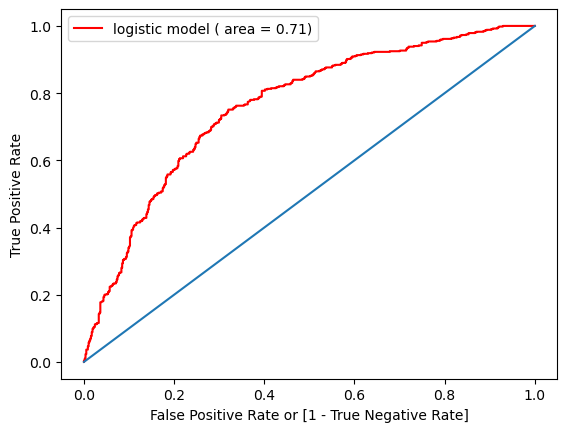

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y,y_predict)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color = 'red', label = 'logistic model ( area = %0.2f)'%auc)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.show()

In [26]:
#HOllistic view

In [27]:
auc

0.7108589063606365

# Multiple Classes

In [29]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac

In [30]:
data = sns.load_dataset("iris")

In [31]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
data.shape

(150, 5)

In [33]:
data["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [34]:
x=data.iloc[:,:4]
y=data.iloc[:,4]
#dividing features and target data

In [39]:
#dividing data into train data and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle= True)
(#randomly 70% for training and 30% for testing)

In [37]:
x_train.shape

(105, 4)

In [38]:
y_train.shape

(105,)

In [40]:
#Logistic regression and fit model
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

C:\Users\Srushti M Prakash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_train_pred=classifier.predict(x_train)

In [42]:
ac(y_train,y_train_pred)

0.9904761904761905

In [44]:
y_test_pred=classifier.predict(x_test)

In [45]:
y_test_pred

array(['versicolor', 'setosa', 'setosa', 'virginica', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa'],
      dtype=object)

In [46]:
ac(y_test_pred,y_test)

0.9111111111111111

In [47]:
classifier.intercept_ #3 classes 3 intercepts

array([  9.32285471,   4.3729364 , -13.69579111])

In [50]:
classifier.coef_ #4 features row1 for  model1 row2 for model 2 row3 for model3

array([[-0.41271256,  0.81217107, -2.31012944, -0.99403266],
       [ 0.15972136, -0.58844201, -0.11065754, -0.71954345],
       [ 0.2529912 , -0.22372906,  2.42078698,  1.71357611]])

In [51]:
set(y_train)

{'setosa', 'versicolor', 'virginica'}

In [54]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_pred,y_test)

array([[14,  0,  0],
       [ 0, 11,  2],
       [ 0,  2, 16]], dtype=int64)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.85      0.85      0.85        13
   virginica       0.89      0.89      0.89        18

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45

